In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms, datasets

In [3]:
# Paso 2: Definir rutas
DATASET_DIR = r"D:\DatasetRecon\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset"  
CATEGORIES = os.listdir(DATASET_DIR)
print("Categorías detectadas:", CATEGORIES)

# Parámetros del preprocesamiento
IMG_SIZE = 224  # tamaño común para CNNs


Categorías detectadas: ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


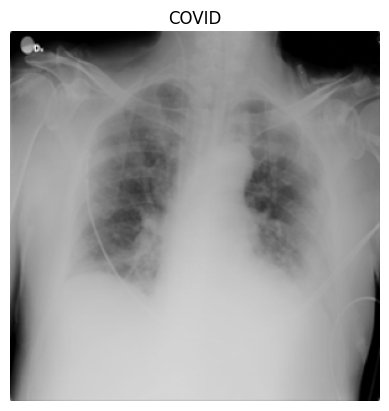

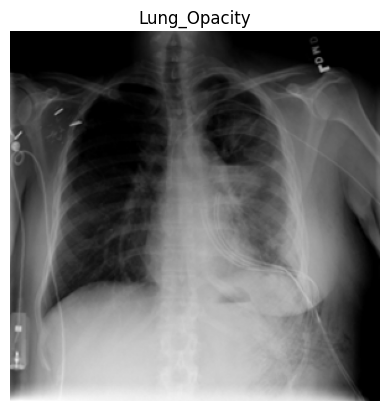

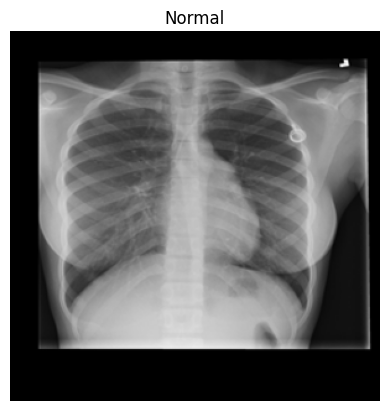

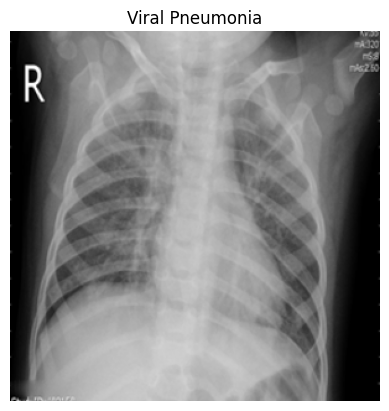

In [4]:
for category in CATEGORIES:
    folder = os.path.join(DATASET_DIR, category)
    sample_path = os.path.join(folder, os.listdir(folder)[0])
    img = cv2.imread(sample_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title(category)
    plt.axis('off')
    plt.show()

In [5]:
def preprocess_image(img_path, apply_bilateral=False):
    # Leer imagen en color
    img = cv2.imread(img_path)
    if img is None:
        return None

    # Redimensionar
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # Aplicar filtro bilateral si se solicita
    if apply_bilateral:
        img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

    # Normalizar a rango [0,1]
    img = img.astype(np.float32) / 255.0

    # Convertir a RGB y tensor de PyTorch (C,H,W)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.transpose(img, (2, 0, 1))

    return img

In [6]:
output_raw = "/content/dataset_preprocessed_raw"
output_filtered = "/content/dataset_preprocessed_filtered"
os.makedirs(output_raw, exist_ok=True)
os.makedirs(output_filtered, exist_ok=True)

for output_dir in [output_raw, output_filtered]:
    for category in CATEGORIES:
        os.makedirs(os.path.join(output_dir, category), exist_ok=True)

print("Estructura de carpetas creada.")

# Procesar imágenes
for category in CATEGORIES:
    input_folder = os.path.join(DATASET_DIR, category)
    raw_folder = os.path.join(output_raw, category)
    filtered_folder = os.path.join(output_filtered, category)

    for filename in tqdm(os.listdir(input_folder), desc=f"Procesando {category}"):
        src = os.path.join(input_folder, filename)

        # Imagen cruda
        img_raw = preprocess_image(src, apply_bilateral=False)
        if img_raw is not None:
            cv2.imwrite(os.path.join(raw_folder, filename), 
                        cv2.cvtColor((img_raw.transpose(1,2,0)*255).astype(np.uint8), cv2.COLOR_RGB2BGR))

        # Imagen filtrada
        img_filtered = preprocess_image(src, apply_bilateral=True)
        if img_filtered is not None:
            cv2.imwrite(os.path.join(filtered_folder, filename), 
                        cv2.cvtColor((img_filtered.transpose(1,2,0)*255).astype(np.uint8), cv2.COLOR_RGB2BGR))

Estructura de carpetas creada.


Procesando Viral Pneumonia: 100%|██████████| 1345/1345 [00:12<00:00, 104.56it/s]
